<a href="https://colab.research.google.com/github/Faizan06-ui/python-practice/blob/main/Sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science with Python - Course-End Project
 # * Sales Analysis
   By Faizan Khurshid



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Load CSV

In [ ]:
df=pd.read_csv('/Users/syedfaizan/Downloads/AusApparalSales4thQrt2020.csv')

In [ ]:
print(df)

             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


# 1.Data Wrangling


In [ ]:
print(df.notna().sum()) # returns the number of non-null values in each column

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [ ]:
print(df.isna().sum()) # checking for missing values
df = df.dropna()
print(df.isna().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [ ]:
df['Date'].unique() # unique dates in the dataset

array(['1-Oct-2020', '2-Oct-2020', '3-Oct-2020', '4-Oct-2020',
       '5-Oct-2020', '6-Oct-2020', '7-Oct-2020', '8-Oct-2020',
       '9-Oct-2020', '10-Oct-2020', '11-Oct-2020', '12-Oct-2020',
       '13-Oct-2020', '14-Oct-2020', '15-Oct-2020', '16-Oct-2020',
       '17-Oct-2020', '18-Oct-2020', '19-Oct-2020', '20-Oct-2020',
       '21-Oct-2020', '22-Oct-2020', '23-Oct-2020', '24-Oct-2020',
       '25-Oct-2020', '26-Oct-2020', '27-Oct-2020', '28-Oct-2020',
       '29-Oct-2020', '30-Oct-2020', '1-Nov-2020', '2-Nov-2020',
       '3-Nov-2020', '4-Nov-2020', '5-Nov-2020', '6-Nov-2020',
       '7-Nov-2020', '8-Nov-2020', '9-Nov-2020', '10-Nov-2020',
       '11-Nov-2020', '12-Nov-2020', '13-Nov-2020', '14-Nov-2020',
       '15-Nov-2020', '16-Nov-2020', '17-Nov-2020', '18-Nov-2020',
       '19-Nov-2020', '20-Nov-2020', '21-Nov-2020', '22-Nov-2020',
       '23-Nov-2020', '24-Nov-2020', '25-Nov-2020', '26-Nov-2020',
       '27-Nov-2020', '28-Nov-2020', '29-Nov-2020', '30-Nov-2020',
       '1-Dec

In [ ]:
df['Date'].value_counts() # count of each date in the dataset


Date
1-Oct-2020     84
8-Dec-2020     84
6-Dec-2020     84
5-Dec-2020     84
4-Dec-2020     84
               ..
29-Oct-2020    84
28-Oct-2020    84
27-Oct-2020    84
26-Oct-2020    84
30-Dec-2020    84
Name: count, Length: 90, dtype: int64

In [ ]:
data_dates=pd.to_datetime(df['Date'].unique())
data_dates_formatted = [i.strftime('%d-%b-%y') for i in data_dates]
# create a list of formatted dates from the datasetdata_dates_formatted

In [ ]:
ideal_dates_formatted = [i.strftime('%d-%b-%y') for i in pd.date_range(start='2020-10-01', end='2020-12-31', freq='D')]
ideal_dates_formatted # create a list of ideal dates from 1st Oct to 31st Dec 2020

['01-Oct-20',
 '02-Oct-20',
 '03-Oct-20',
 '04-Oct-20',
 '05-Oct-20',
 '06-Oct-20',
 '07-Oct-20',
 '08-Oct-20',
 '09-Oct-20',
 '10-Oct-20',
 '11-Oct-20',
 '12-Oct-20',
 '13-Oct-20',
 '14-Oct-20',
 '15-Oct-20',
 '16-Oct-20',
 '17-Oct-20',
 '18-Oct-20',
 '19-Oct-20',
 '20-Oct-20',
 '21-Oct-20',
 '22-Oct-20',
 '23-Oct-20',
 '24-Oct-20',
 '25-Oct-20',
 '26-Oct-20',
 '27-Oct-20',
 '28-Oct-20',
 '29-Oct-20',
 '30-Oct-20',
 '31-Oct-20',
 '01-Nov-20',
 '02-Nov-20',
 '03-Nov-20',
 '04-Nov-20',
 '05-Nov-20',
 '06-Nov-20',
 '07-Nov-20',
 '08-Nov-20',
 '09-Nov-20',
 '10-Nov-20',
 '11-Nov-20',
 '12-Nov-20',
 '13-Nov-20',
 '14-Nov-20',
 '15-Nov-20',
 '16-Nov-20',
 '17-Nov-20',
 '18-Nov-20',
 '19-Nov-20',
 '20-Nov-20',
 '21-Nov-20',
 '22-Nov-20',
 '23-Nov-20',
 '24-Nov-20',
 '25-Nov-20',
 '26-Nov-20',
 '27-Nov-20',
 '28-Nov-20',
 '29-Nov-20',
 '30-Nov-20',
 '01-Dec-20',
 '02-Dec-20',
 '03-Dec-20',
 '04-Dec-20',
 '05-Dec-20',
 '06-Dec-20',
 '07-Dec-20',
 '08-Dec-20',
 '09-Dec-20',
 '10-Dec-20',
 '11-D

In [ ]:
set(ideal_dates_formatted) - set(data_dates_formatted) # missing dates in the dataset

{'31-Dec-20', '31-Oct-20'}

In [ ]:
df['Date'].value_counts() # count of each date in the dataset

Date
1-Oct-2020     84
8-Dec-2020     84
6-Dec-2020     84
5-Dec-2020     84
4-Dec-2020     84
               ..
29-Oct-2020    84
28-Oct-2020    84
27-Oct-2020    84
26-Oct-2020    84
30-Dec-2020    84
Name: count, Length: 90, dtype: int64

# 2. Data Analysis

In [ ]:
df.describe() # Descriptive statistics of the DataFrame

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [ ]:
df.groupby('Group').agg ({'Sales':'sum'}).sort_values('Sales') # Total sales by group, sorted in ascending order

,Sales
Group,
Seniors,84037500
Kids,85072500
Women,85442500
Men,85750000


In [ ]:
df.groupby('State').agg ({'Sales':'sum'}).sort_values('Sales', ascending=False) # total sales by state

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()  # Extracting month names from the Date column
df


,Date,Time,State,Group,Unit,Sales,Month
0,1-Oct-2020,Morning,WA,Kids,8,20000,October
1,1-Oct-2020,Morning,WA,Men,8,20000,October
2,1-Oct-2020,Morning,WA,Women,4,10000,October
3,1-Oct-2020,Morning,WA,Seniors,15,37500,October
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,October
...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,December
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,December
7557,30-Dec-2020,Evening,TAS,Men,15,37500,December
7558,30-Dec-2020,Evening,TAS,Women,11,27500,December


In [ ]:
df['weekday']= pd.to_datetime(df['Date']).dt.day_name() # Extracting weekday names from the Date column
df

,Date,Time,State,Group,Unit,Sales,Month,weekday
0,1-Oct-2020,Morning,WA,Kids,8,20000,October,Thursday
1,1-Oct-2020,Morning,WA,Men,8,20000,October,Thursday
2,1-Oct-2020,Morning,WA,Women,4,10000,October,Thursday
3,1-Oct-2020,Morning,WA,Seniors,15,37500,October,Thursday
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,October,Thursday
...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,December,Wednesday
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,December,Wednesday
7557,30-Dec-2020,Evening,TAS,Men,15,37500,December,Wednesday
7558,30-Dec-2020,Evening,TAS,Women,11,27500,December,Wednesday


# 3. Data Visualization

<Axes: xlabel='State'>

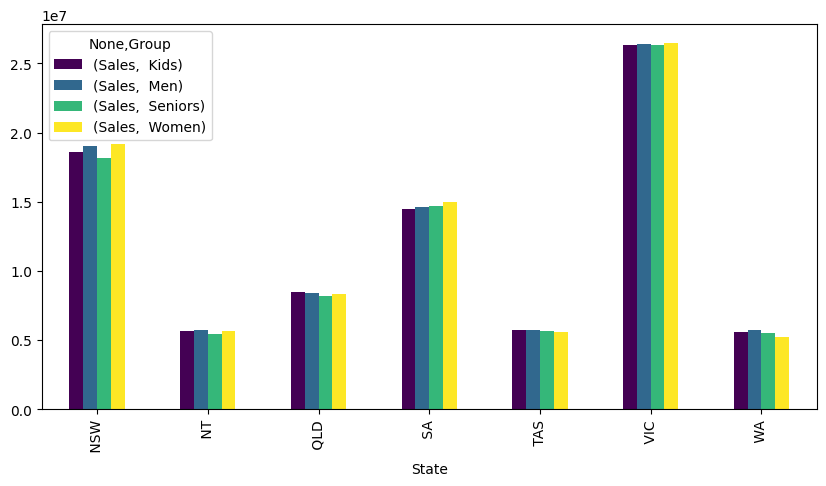

In [ ]:
df.groupby(['State','Group']).agg ({'Sales':'sum'}).unstack().plot(kind='bar' ,figsize=(10, 5),colormap='viridis')
# Total sales by state and group, unstacked for better visualization

<Axes: xlabel='Group'>

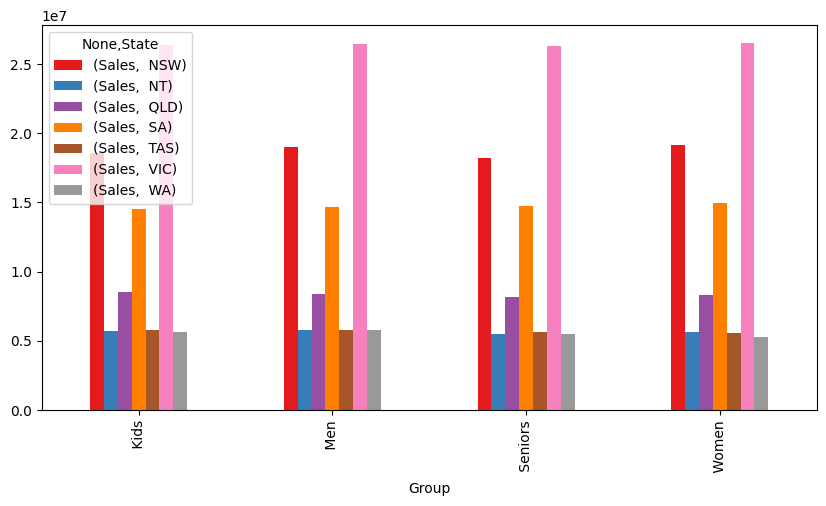

In [ ]:
df.groupby(['Group','State']).agg ({'Sales':'sum'}).unstack().plot(kind='bar' ,figsize=(10, 5),colormap='Set1')
# Plotting sales by Group and state

In [ ]:
df.groupby(['Group','Time']).agg ({'Sales':'sum'}).sort_values('Sales') #Grouping sales by Time

Sales
Group   Time               
Seniors Evening    27267500
Kids    Evening    28052500
Seniors Afternoon  28195000
Men     Evening    28222500
Women   Morning    28355000
Kids    Afternoon  28502500
        Morning    28517500
Women   Afternoon  28542500
        Evening    28545000
Seniors Morning    28575000
Men     Morning    28760000
        Afternoon  28767500

<Axes: xlabel='Group'>

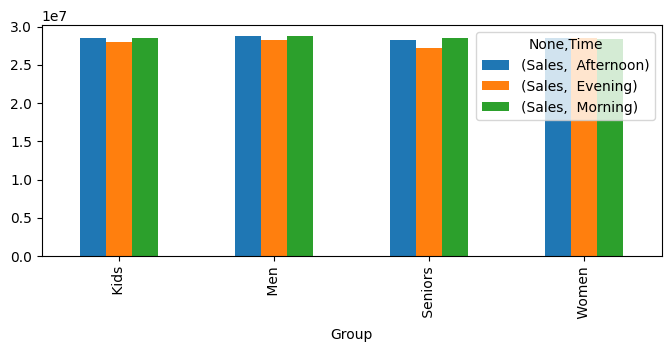

In [ ]:
df.groupby(['Group','Time']).agg ({'Sales':'sum'}).unstack().plot(kind='bar' ,figsize=(8, 3))
 # plotting sales by Time

<Axes: xlabel='None,Month'>

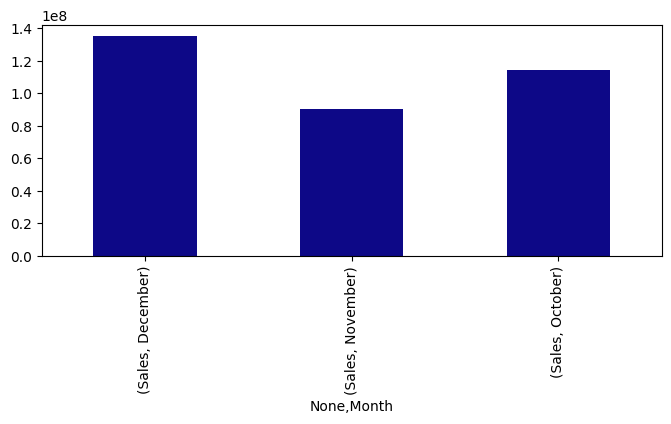

In [ ]:
df.groupby(['Month']).agg ({'Sales':'sum'}).unstack().plot(kind='bar' ,figsize=(8, 3),colormap='plasma')
#  plotting sales by Month

<Axes: xlabel='None,weekday'>

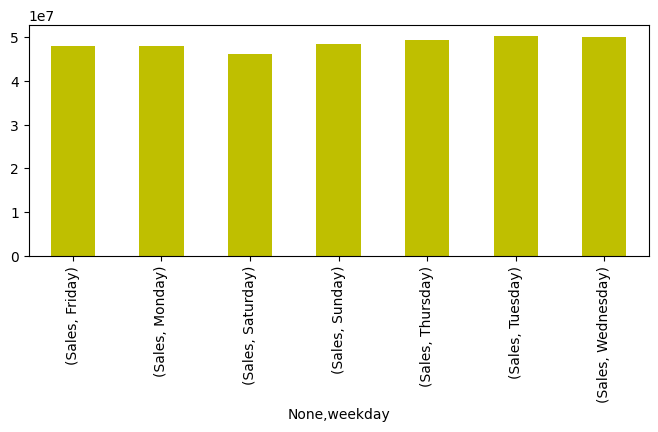

In [ ]:
df.groupby(['weekday']).agg ({'Sales':'sum'}).unstack().plot(kind='bar' ,figsize=(8, 3),color='y')
#plotting sales by weekday

<Axes: xlabel='State'>

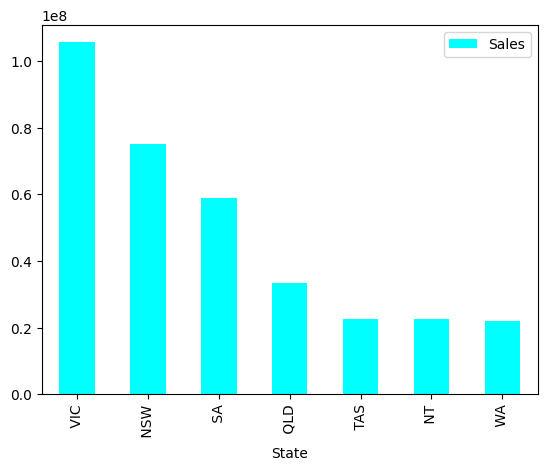

In [ ]:
df.groupby('State').agg ({'Sales':'sum'}).sort_values('Sales', ascending=False).plot(kind='bar',color='cyan',width=0.5)
# plotting the total sales by state

# C. Recommendation of the chosen package
I have chosen Pandas, matplotlib and seaborn libraries for this project:

  * Pandas allows me to generate plots directly from DataFrames using .plot(). This removes the need to convert data into arrays, making the workflow straightforward.

* Pandas plotting is excellent for generating quick line charts, bar charts, and area plots that help in understanding Sales.
- While Seaborn handles most statistical plots, Matplotlib is used for **fine-tuning visualizations** (titles, labels, rotation of axes, subplots).  
- The combination of Seaborn + Matplotlib ensures that the dashboard is both **insightful** and **presentable**.

# Box Plot

<Axes: >

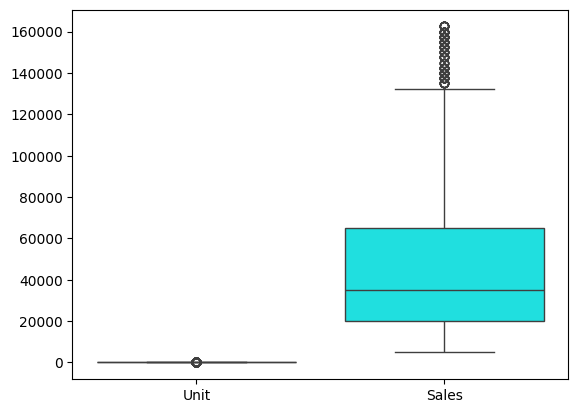

In [ ]:
sns.boxplot(data=df,color='aqua') # Boxplot of the dataset to visualize the distribution

# Histogram of sales distribution

Text(0.5, 1.0, 'Sales Distribution')

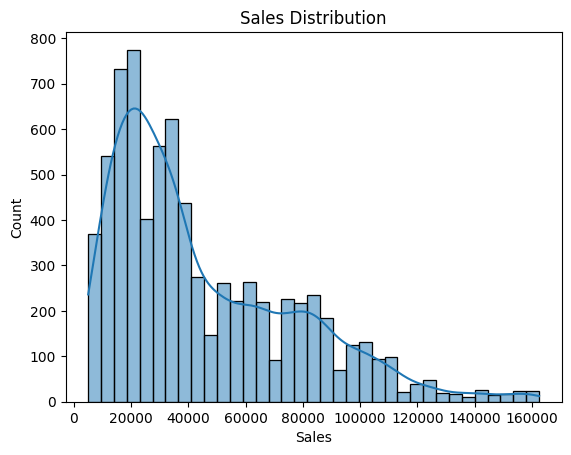

In [ ]:
sns.histplot(df['Sales'], kde=True) # Plotting sales distribution with a histogram and KDE
plt.title("Sales Distribution")